# Práctica 4 - Imágenes y gráficas (estadística descriptiva)

**Alumno:** Axel Daniel Malváez Flores

**No. Cta:** 318315126

**Materia:** Viasualización de la Información

### Objetivo:

El objetivo de esta práctica es empezar a manipular interpolación de colores para mejorar la calida de las imágenes al momento de hacer zoom. Aunado a que también debemos de graficar de manera descriptiva ciertos datos del conjunto **Iris**.

Librerías que utilizaremos

In [1]:
from IPython import display
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

## EJERCICIOS Script IMG
$\color{red}{\text{(1)}}$ Muestre una **ecualización de histograma** de la imagen "lena.png" para mejorar el contraste, es decir, modificar intensidades de pixel. Mencione si hay diferencias.

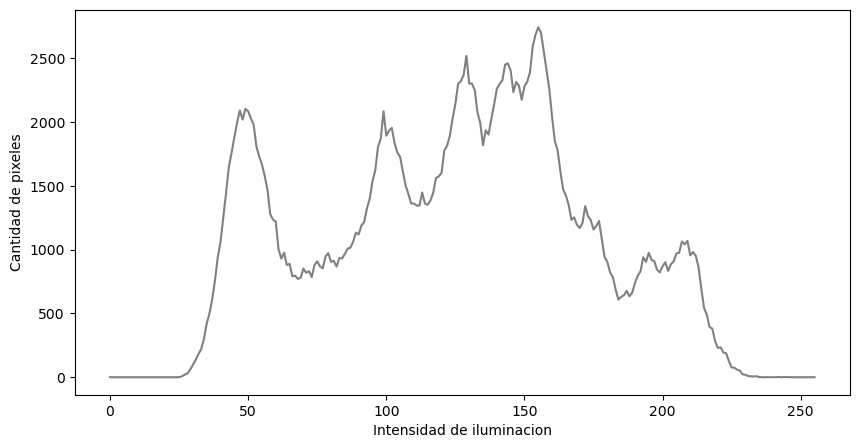

-1

In [2]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('lena original', img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')

plt.xlabel('Intensidad de iluminacion')
plt.ylabel('Cantidad de pixeles')
plt.show()

cv2.waitKey(0) 
cv2.destroyAllWindows()  
cv2.waitKey(1)

In [3]:
img = cv2.imread('lena.png')
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
cv2.imwrite('lenaEqualizada.png',hist_equalization_result)

img_eq = cv2.imread('lenaEqualizada.png')
cv2.imshow('lenaEqualizada.png', img_eq)

cv2.waitKey(0) 
cv2.destroyAllWindows()  
cv2.waitKey(1)

-1

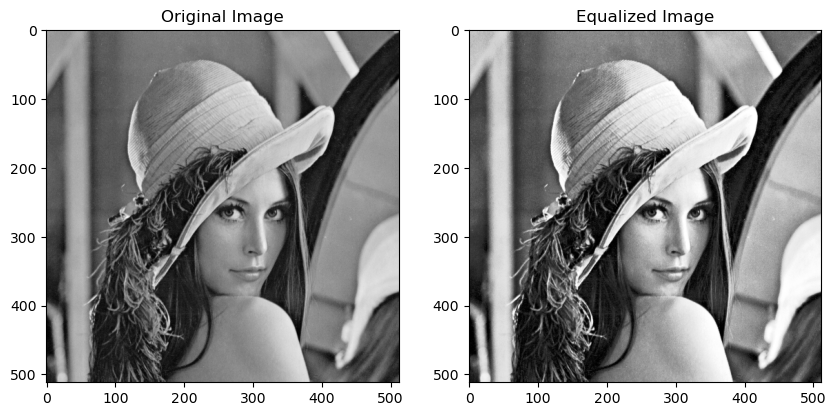

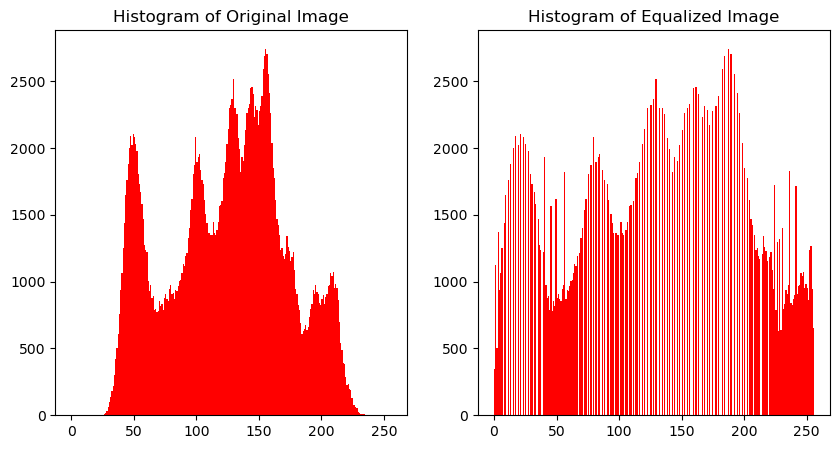

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
eq_img = cv2.equalizeHist(img)

# Plot the original and equalized images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(eq_img, cmap='gray')
ax2.set_title('Equalized Image')

# Plot the histograms of the original and equalized images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(img.flatten(), 256, [0, 256], color='r')
ax1.set_title('Histogram of Original Image')
ax2.hist(eq_img.flatten(), 256, [0, 256], color='r')
ax2.set_title('Histogram of Equalized Image')
plt.show()


$\color{red}{\text{(2)}}$ Muestre tres regiones ("zoom") de la imagen "lena.png" con tres métodos de interpolación diferentes y explique brevemente sus observaciones. 

Interpolaciones que tenemos: None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

In [5]:
# Cargamos la imagen
a = cv2.imread('lena.png')

# Coordenadas de la región a la que se quiere hacer Zoom
#Lena_zoom=a[200:400,200:350] # 251:283,317:349
Lena_zoom=a[251:283,317:349]

plt.figure()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

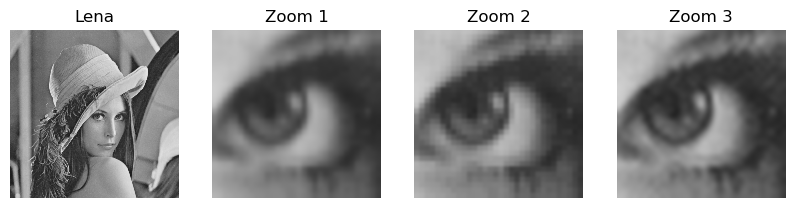

In [6]:
plt.subplot(141)
plt.imshow(a,cmap='gray',interpolation='none')
plt.title('Lena'),plt.axis('off') 

plt.subplot(142)
plt.imshow(Lena_zoom,cmap='gray',interpolation='gaussian')
plt.title("Zoom 1"),plt.axis('off')

plt.subplot(143)
plt.imshow(Lena_zoom,cmap='gray',interpolation='kaiser')
plt.title("Zoom 2"),plt.axis('off')

plt.subplot(144)
plt.imshow(Lena_zoom,cmap='gray',interpolation='lanczos')
plt.title("Zoom 3"),plt.axis('off')

plt.show()

**Explicación**

Notemos que tenemos el mismo zoom del ojo, sin embargo utilizamos diferentes tipos de interpolación.

* Zoom 1: Este tipo de interpolación causa un tipo de borrosidad en la imagen sin embargo el pixelado ya no es notable.
* Zoom 2: Este tipo de interpoalación sigue notando el pixelado, no obstante lo reduce con respecto al original.
* Zoom 3: Este tipo de interpolación causa un efecto de ruido, igualmente el pixelado ya no es notable.

## EJERCICIOS Script PCA

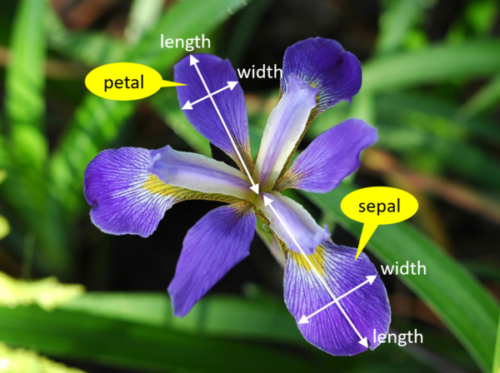

In [7]:
import IPython.display as display
from PIL import Image
display.display(Image.open('iris_petal-sepal.png'))

In [8]:
# Carga de los datos y librerías
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


$\color{red}{\text{(1)}}$ Trace un gráfico de barras que muestre el número de datos disponibles para cada especie en el conjunto de datos. Ponga un color diferente para cada especie.

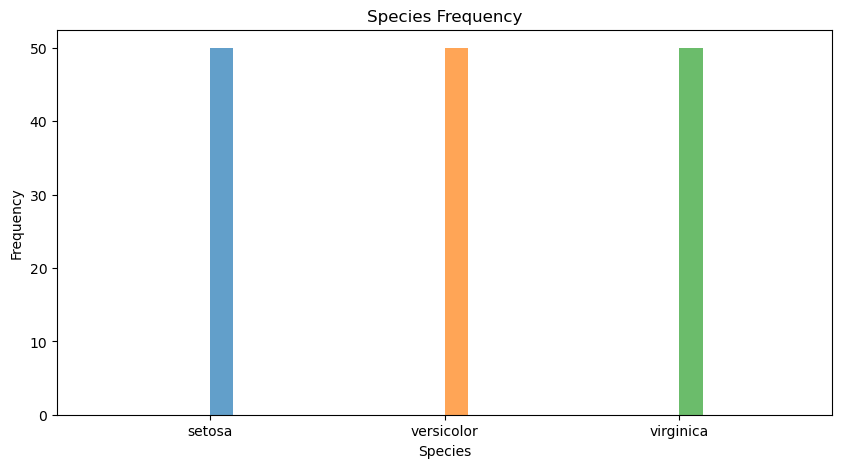

In [9]:
column1 = df[df['Species'] == 'setosa']['Species']
column2 = df[df['Species'] == 'versicolor']['Species']
column3 = df[df['Species'] == 'virginica']['Species']

plt.hist(column1, alpha = 0.7)
plt.hist(column2, alpha = 0.7)
plt.hist(column3, alpha = 0.7)

plt.xlabel('Species')
plt.ylabel('Frequency')

plt.title("Species Frequency")
plt.show()

$\color{red}{\text{(2)}}$ Elabore un diagrama de caja (Box plot) del conjunto de datos, que nos muestre la representación visual de cómo se dispersan nuestros datos en el plano. Este método se utiliza en el análisis estadístico para comprender varias medidas, como la media, la mediana y la desviación.

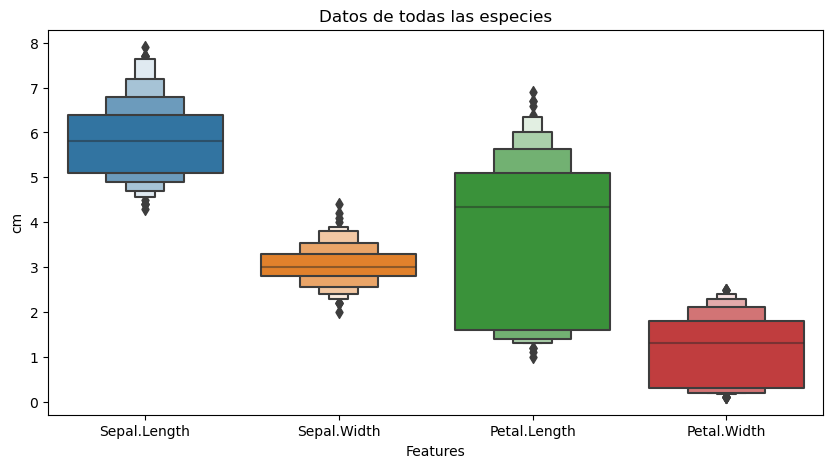

In [10]:
import seaborn as sns

# Creamos el boxplot
sns.boxenplot(data=df)

plt.xlabel('Features')
plt.ylabel('cm')
plt.title('Datos de todas las especies')

plt.show()


$\color{red}{\text{(3)}}$ Muestre una gráfica que permita analizar la longitud del sépalo para cada especie. Esto es, analice cada atributo por separado para cada especie. Use un color diferente para cada especie.

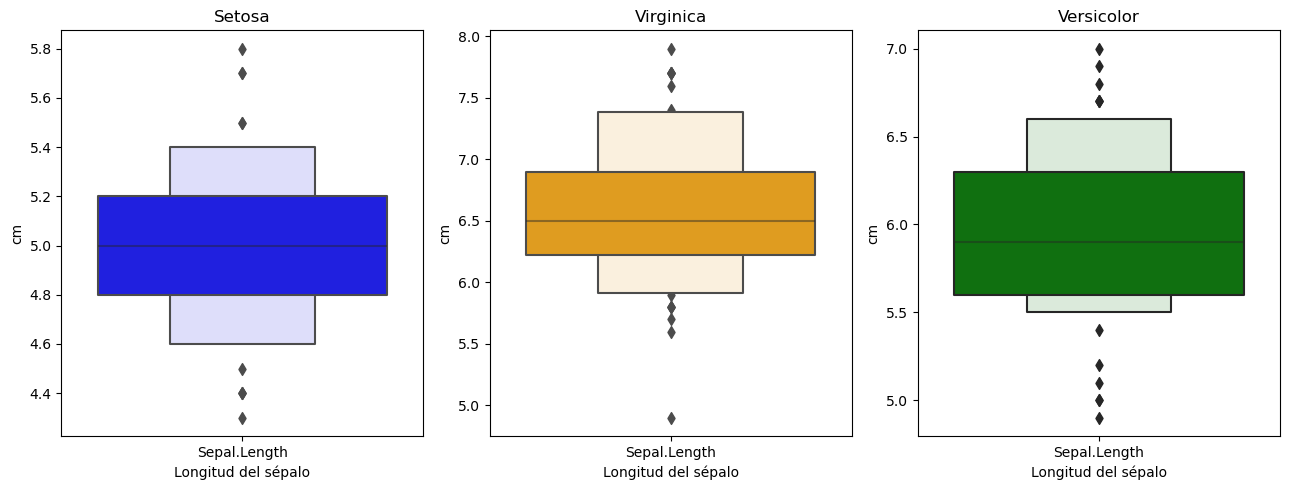

In [11]:
import seaborn as sns

# Creamos el boxplot
sepalo_versicolor = df[df['Species'] == 'versicolor'].loc[:,['Sepal.Length']]
sepalo_virginica = df[df['Species'] == 'virginica'].loc[:,['Sepal.Length']]
sepalo_setosa =  df[df['Species'] == 'setosa'].loc[:,['Sepal.Length']]


# Creamos los subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 5))

# Creamos el boxplot
sns.boxenplot(data=sepalo_setosa, ax=ax1, color='blue')
ax1.set_xlabel('Longitud del sépalo')
ax1.set_ylabel('cm')
ax1.set_title('Setosa')

sns.boxenplot(data=sepalo_virginica, ax=ax2, color='orange')
ax2.set_xlabel('Longitud del sépalo')
ax2.set_ylabel('cm')
ax2.set_title('Virginica')

sns.boxenplot(data=sepalo_versicolor, ax=ax3, color='green')
ax3.set_xlabel('Longitud del sépalo')
ax3.set_ylabel('cm')
ax3.set_title('Versicolor')

fig.tight_layout()
plt.show()

$\color{red}{\text{(4)}}$ Trace una gráfica que indique el promedio de todas las longitudes de sépalos de especies de Iris. Use un color diferente para cada especie.

/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


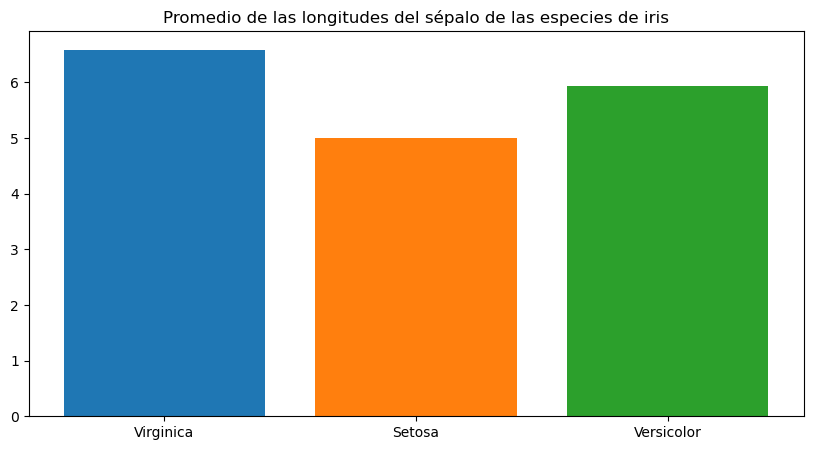

In [12]:
m_setosa = np.mean(sepalo_setosa)
m_versicolor = np.mean(sepalo_versicolor)
m_virginica = np.mean(sepalo_virginica)

plt.bar(['Virginica'],m_virginica)
plt.bar(['Setosa'],m_setosa)
plt.bar(['Versicolor'],m_versicolor)


plt.title('Promedio de las longitudes del sépalo de las especies de iris')
plt.show()

$\color{red}{\text{(5)}}$ Elabore una gráfica que nos permita identificar cada especie con sus atributos. Esto es, una gráfica que me permita clasificar si una especie en particular es Iris-setosa, Iris-versicolor o Iris-virginica.  

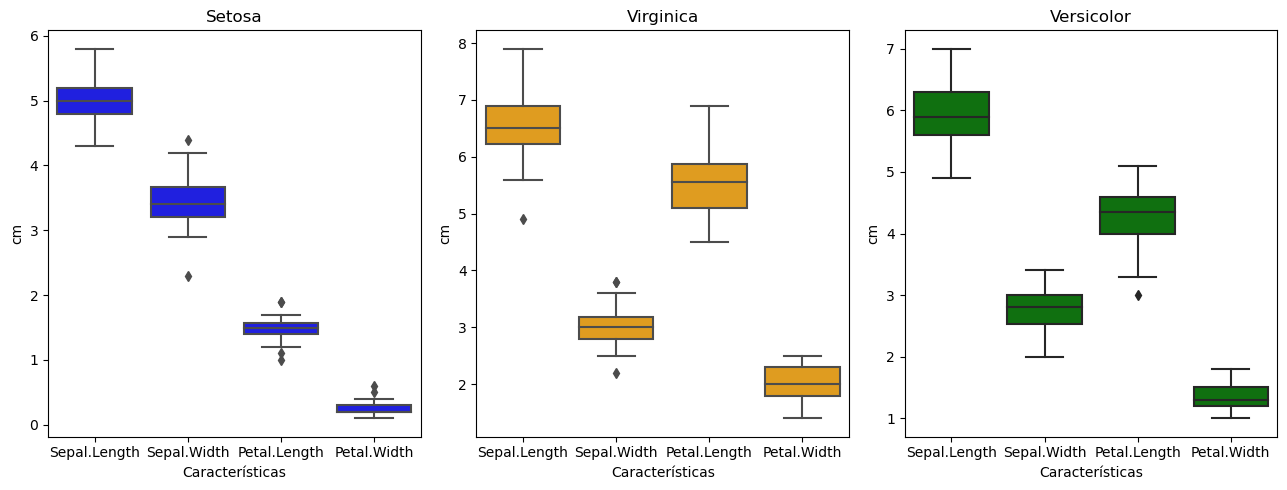

In [13]:
import seaborn as sns

df_setosa = df[df['Species'] == 'setosa']
df_virginica = df[df['Species'] == 'virginica']
df_versicolor = df[df['Species'] == 'versicolor']

# Creamos los subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 5))

# Creamos el boxplot
sns.boxplot(data=df_setosa, ax=ax1, color='blue')
ax1.set_xlabel('Características')
ax1.set_ylabel('cm')
ax1.set_title('Setosa')

sns.boxplot(data=df_virginica, ax=ax2, color='orange')
ax2.set_xlabel('Características')
ax2.set_ylabel('cm')
ax2.set_title('Virginica')

sns.boxplot(data=df_versicolor, ax=ax3, color='green')
ax3.set_xlabel('Características')
ax3.set_ylabel('cm')
ax3.set_title('Versicolor')

fig.tight_layout()
plt.show()

## Conclusión

Se logró concretar la práctica con éxito, permitiendo incrementar el conocimiento sobre la graficación y procesamiento de imágenes básico. Se logró cumplir el objetivo.